# Assignment 4

In [3]:
# Import numpy
import numpy as np

In [4]:
# Initial weights
W = np.array([[3.0,0.0,0.0,0.0],[-4.0,1.0,0.0,0.0],[-1.0,-3.0,0.0,0.0],[0.0,0.0,2.0,-10.0]])
print(W)

[[  3.   0.   0.   0.]
 [ -4.   1.   0.   0.]
 [ -1.  -3.   0.   0.]
 [  0.   0.   2. -10.]]


## a)

In [5]:
# Definition of activation functions
def relu(x):
    fx = 0.0
    if x >= 0.0:
        fx = x
    return fx

# relu vectorized
v_relu = np.vectorize(relu)

def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

# sigmoid vectorized
v_sigmoid = np.vectorize(sigmoid)

# Forward propagation vectorized
def v_fpropagation(W,X):
    # first layer
    W1 = W[[3],2:4:1]
    a3a4 = X.dot(W1)
    z3z4 = v_sigmoid(a3a4)
    # second layer
    W2 = W[1:3:1,[1]]
    a2 = z3z4.dot(W2)
    z2 = v_relu(a2)
    # third layer
    W3 = W[0:3:1,[0]]
    z2z3z4 = np.append(z2,z3z4,axis=1)
    a1 = z2z3z4.dot(W3)
    y = v_sigmoid(a1)
    return [y,a1,z2,a2,z3z4,a3a4]
    

Forward propagation on the vector $X = \begin{bmatrix}0.0\\ 1.0\\ \end{bmatrix}$.

In [6]:
X = np.array([[0.0],[1.0]])
print("Input:\n",X)
fnn = v_fpropagation(W,X)
print("Output:\n",fnn)

Input:
 [[ 0.]
 [ 1.]]
Output:
 [array([[ 0.07585818],
       [ 0.2929186 ]]), array([[-2.5       ],
       [-0.88125106]]), array([[ 0.        ],
       [ 0.88066088]]), array([[-1.        ],
       [ 0.88066088]]), array([[  5.00000000e-01,   5.00000000e-01],
       [  8.80797078e-01,   4.53978687e-05]]), array([[  0.,  -0.],
       [  2., -10.]])]


## b)

In [7]:
# Definition of step function modified at zero
def step(x):
    fx = 0.0 # take this as the derivative of relu at 0
    if x > 0:
        fx = 1.0
    return fx

# Step vectorized
v_step = np.vectorize(step)

In [8]:
# Definition of the errors function (calculate the deltas)
def v_deltas(W,X,t):
    [y,a1,z2,a2,z3z4,a3a4] = v_fpropagation(W,X)
    delta1 = -(t-y)*y*(1-y)
    bW1 = W[[0],0] # w2_1
    delta2 = delta1*bW1*v_step(a2)
    delta1d2 = np.append(delta1,delta2,axis=1)
    bW2 = W[[1,2],0:2:1].transpose() #[[w3_1,w4_1],[w3_2,w4_2]]
    delta3d4 = delta1d2.dot(bW2)*v_sigmoid(a3a4)*(1-v_sigmoid(a3a4))
    bW3 = W[[3],2:4:1].transpose()
    delta5 = delta3d4.dot(bW3)
    return [delta1,delta2,delta3d4,delta5,y,a1,z2,a2,z3z4,a3a4]
    
    

# c)

In [9]:
t = np.array([[.5],[.1]])
print("Targets:\n",t)
bdeltas = v_deltas(W,X,t)
print("Deltas:\n",bdeltas)

Targets:
 [[ 0.5]
 [ 0.1]]
Deltas:
 [array([[-0.02973392],
       [ 0.03995678]]), array([[-0.        ],
       [ 0.11987033]]), array([[  2.97339179e-02,   7.43347948e-03],
       [ -4.19520531e-03,  -1.81387018e-05]]), array([[-0.01486696],
       [-0.00820902]]), array([[ 0.07585818],
       [ 0.2929186 ]]), array([[-2.5       ],
       [-0.88125106]]), array([[ 0.        ],
       [ 0.88066088]]), array([[-1.        ],
       [ 0.88066088]]), array([[  5.00000000e-01,   5.00000000e-01],
       [  8.80797078e-01,   4.53978687e-05]]), array([[  0.,  -0.],
       [  2., -10.]])]


## d)

In [15]:
# Loss function
def loss(W,X,t):
    fnn = v_fpropagation(W,X)
    y = fnn[0]
    E = np.sum(np.square(t-y))/2
    return E

# Function to train the network using Stochastic Gradient Descent (SGD)
def SGD(X,t,eta):
    # Number of training samples
    m = len(t)
    # Initialize the weights W
    W = np.sqrt(2)*np.random.randn(4,4)
    multW = np.array([[1.,0.,0.,0.],[1.,1.,0.,0.],[1.,1.,0.,0.],[0.,0.,1.,1.]]) # multiply and get zeros where needed
    W = W*multW
    #W = np.array([[3.0,0.0,0.0,0.0],[-4.0,1.0,0.0,0.0],[-1.0,-3.0,0.0,0.0],[0.0,0.0,2.0,-10.0]])
    # print loss and weights
    print("Loss at the beginning: %f" %loss(W,X,t))
    print(W)
    # vector to store loss at iteration i
    L = []
    # SGD
    # random permutation of indices
    ind = np.random.permutation(m)
    for i in range(0,m):
        # fpropagation, deltas and bpropagation calculated on sample i only
        [delta1,delta2,delta3d4,delta5,y,a1,z2,a2,z3z4,a3a4] = v_deltas(W,X[[ind[i]]],t[[ind[i]]])
        dw2_1 = delta1*z2
        dw3n4_1 = delta1*z3z4
        dw3n4_2 = delta2*z3z4
        dw5_3n4 = delta3d4*X[[ind[i]]]
        
        # parameter update
        W[0,0] += -eta*dw2_1
        W[1:3:1,[0]] += -eta*dw3n4_1.transpose()
        W[1:3:1,[1]] += -eta*dw3n4_2.transpose()
        W[[3],2:4:1] += -eta*dw5_3n4
        
        # print loss and weights
        L.append(loss(W,X,t))
        if L[i] < 0.01:
            return W, L
        print("Loss after iteration %i: %f" %(i, L[i]))
        print(W)
    
    L = np.array(L)
    return W, L

In [16]:
# training samples
trainX = np.array([[-3.],[-2.],[-1.5],[-1.],[-.5],[0.],[.5],[1.],[1.5],[2.],[3.]])
traint = np.array([[.7312],[.7339],[.7438],[.7832],[.8903],[.9820],[.8114],[.5937],[.5219],[.5049],[.5002]])

In [17]:
# Learning rate eta
eta = 10
# training the nn
Wmodel, Loss = SGD(trainX,traint,eta)

Loss at the beginning: 1.598042
[[-1.3587122   0.          0.          0.        ]
 [-2.21111822 -0.80143146 -0.          0.        ]
 [-0.47101429  0.06698397  0.          0.        ]
 [ 0.          0.         -1.52491538  1.97349581]]
Loss after iteration 0: 1.116756
[[-1.3587122   0.          0.          0.        ]
 [-1.57454845 -0.80143146 -0.          0.        ]
 [ 0.16555548  0.06698397  0.          0.        ]
 [ 0.          0.         -1.52491538  1.97349581]]
Loss after iteration 1: 0.698224
[[-1.3587122   0.          0.          0.        ]
 [-0.78204585 -0.80143146 -0.          0.        ]
 [ 0.16769865  0.06698397  0.          0.        ]
 [ 0.          0.         -1.48671771  1.97243422]]
Loss after iteration 2: 0.299130
[[-1.3587122   0.          0.          0.        ]
 [ 0.03183913 -0.80143146 -0.          0.        ]
 [ 0.49393469  0.06698397  0.          0.        ]
 [ 0.          0.         -1.384156    1.95251072]]
Loss after iteration 3: 0.164363
[[-1.3587122   0

In [18]:
# check predictions of the model on training samples
fnn = v_fpropagation(Wmodel,trainX)
print(fnn[0])

[[ 0.73152693]
 [ 0.72451931]
 [ 0.71713057]
 [ 0.70656289]
 [ 0.69447318]
 [ 0.68318508]
 [ 0.66091854]
 [ 0.59258358]
 [ 0.54491367]
 [ 0.51645451]
 [ 0.49268486]]


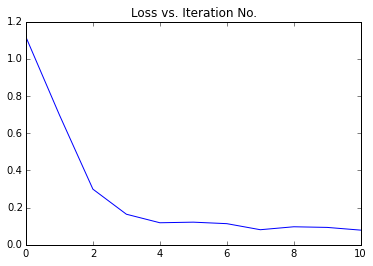

In [19]:
# plot of evolution of errors
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(Loss)
plt.title("Loss vs. Iteration No.")